<a href="https://colab.research.google.com/github/surajj808/Deep-Edge/blob/main/Deep_Edge_AI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:

Using Deep Learning techniques, predict the coordinates (x,y) of a pixel which has a value of
255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0. The pixel with a
value of 255 is randomly assigned. You may generate a dataset as required for solving the
problem. Please explain your rationale behind dataset choices.

In [8]:
# Importing the neccessary libraries for this task

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Image Data Generation

In [2]:
"""
Since the image size is 50*50 pixels, maximum number of unique images will be
2500 only, which is very less for training the model. Hence, we will create
a dataset containing 1,00,000 images arranged randomly in the directory.

"""
# Parameters:

num_images = 100000
img_size = 50                   # Size of each image (50x50 pixels)
save_path = 'generated_images'  # Directory to save the images

def generate_images_with_labels(num_images, img_size, save_path):
  """This function will create our x_train (Images) & y_train (Labels/Coordinates (x,y)) datasets"""
  images = []
  labels = []

  if not os.path.exists(save_path):   # to create Directory
      os.makedirs(save_path)
  for i in range(num_images):  # defining how the images will look like
      image = np.zeros((img_size, img_size), dtype=np.uint8)
      x, y = np.random.randint(0, img_size, size=2)
      image[x, y] = 255 # Setting 1 pixel value = 255 here & rest all = 0 in the above step

      images.append(image)
      labels.append([x, y])

      plt.imsave(f'{save_path}/image_{i+1}.png', image, cmap='gray')

  images = np.array(images).reshape(-1, img_size, img_size, 1)
  """ reshaping from 2D to 3D for CNN input """
  labels = np.array(labels)

  return images, labels

training_images, training_labels = generate_images_with_labels(
    num_images, img_size, save_path
    )

# Sample Image Visualization from the Directory

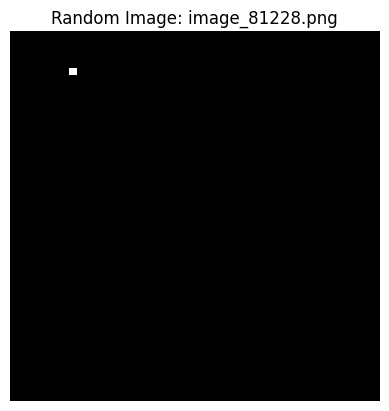

In [3]:
# Get a list of all image files & selecting a random to visualize
image_files = [f for f in os.listdir(save_path) if f.endswith('.png')]
random_image_file = random.choice(image_files)

image_path = os.path.join(save_path, random_image_file)

# Load the image using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f'Random Image: {random_image_file}')
plt.axis('off')
plt.show()

# Implementing a CNN Model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2))

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 14s 7ms/step - loss: 5.0024 - accuracy: 0.9850 - val_loss: 0.2070 - val_accuracy: 0.9931
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2647 - accuracy: 0.9894 - val_loss: 0.3032 - val_accuracy: 0.9905
Epoch 3/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1851 - accuracy: 0.9893 - val_loss: 0.0463 - val_accuracy: 0.9905
Epoch 4/30
1250/1250 [==============================] - 9s 8ms/step - loss: 0.1295 - accuracy: 0.9898 - val_loss: 0.1483 - val_accuracy: 0.9912
Epoch 5/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1121 - accuracy: 0.9898 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0993 - accuracy: 0.9896 - val_loss: 0.1030 - val_accuracy: 0.9837
Epoch 7/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0913 - accuracy: 0.9893 - val_loss: 0.0171 - val_accuracy

In [5]:
"""
Generating some test images to evaluate the model, since previously
we only generated the training dataset.
"""
test_images, test_labels = generate_images_with_labels(100, img_size, save_path)

In [6]:
# Checking predictions by the model

predictions = model.predict(test_images)

predicted_coordinates = np.round(predictions).astype(int)  # Optional Step

for i in range(10):      # To Display only 10 results
    actual = test_labels[i]
    predicted = predicted_coordinates[i]
    print(f"Actual: {actual}, Predicted: {predicted}")

4/4 [==============================] - 0s 60ms/step
Actual: [15 16], Predicted: [15 16]
Actual: [19 17], Predicted: [19 17]
Actual: [40 33], Predicted: [40 33]
Actual: [46 37], Predicted: [46 37]
Actual: [2 4], Predicted: [2 4]
Actual: [45 45], Predicted: [45 45]
Actual: [29 34], Predicted: [29 34]
Actual: [17 22], Predicted: [17 22]
Actual: [ 2 10], Predicted: [ 2 10]
Actual: [25 42], Predicted: [25 42]


In [7]:
"""
Here are the actually predicted values in decimals which justifies
the val_accuracy at last epoch: 0.9886 (98.86%)

"""

for i in range(10):
    actual = test_labels[i]
    predicted = predictions[i]
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: [15 16], Predicted: [14.929218 15.930719]
Actual: [19 17], Predicted: [18.865046 16.865385]
Actual: [40 33], Predicted: [39.872227 32.85922 ]
Actual: [46 37], Predicted: [46.170357 37.01085 ]
Actual: [2 4], Predicted: [1.998807  3.8550415]
Actual: [45 45], Predicted: [45.11209 45.125  ]
Actual: [29 34], Predicted: [28.870989 33.7684  ]
Actual: [17 22], Predicted: [16.884224 21.879808]
Actual: [ 2 10], Predicted: [1.942831 9.765897]
Actual: [25 42], Predicted: [24.93981 41.86728]


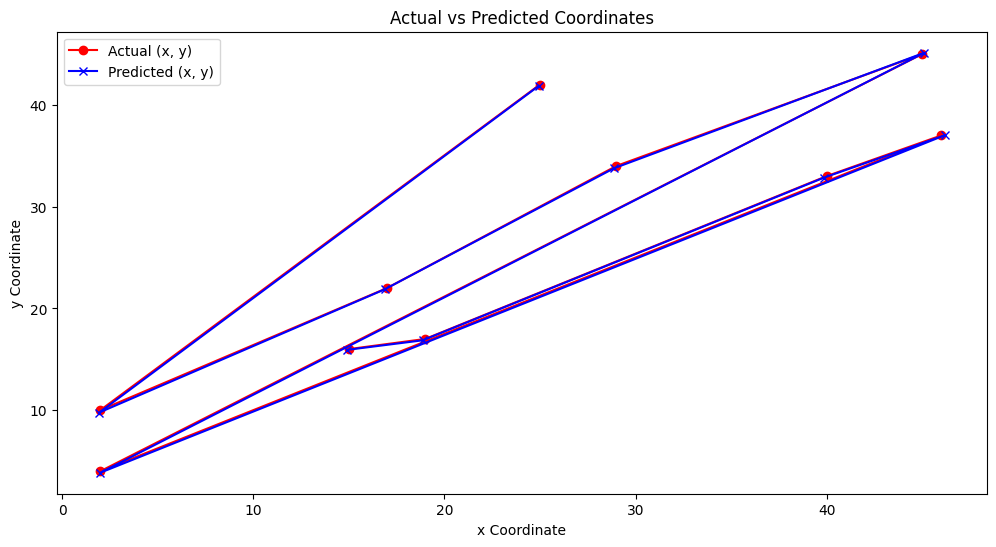

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(test_labels[:10, 0], test_labels[:10, 1], 'ro-', label='Actual (x, y)')
plt.plot(predictions[:10, 0], predictions[:10, 1], 'bx-', label='Predicted (x, y)')

plt.title('Actual vs Predicted Coordinates')
plt.xlabel('x Coordinate')
plt.ylabel('y Coordinate')
plt.legend()
plt.show()

From the above Figure, it can be seen that the difference between Actual & the predicted values is almost negligible. Hence, the model is having high accuracy.

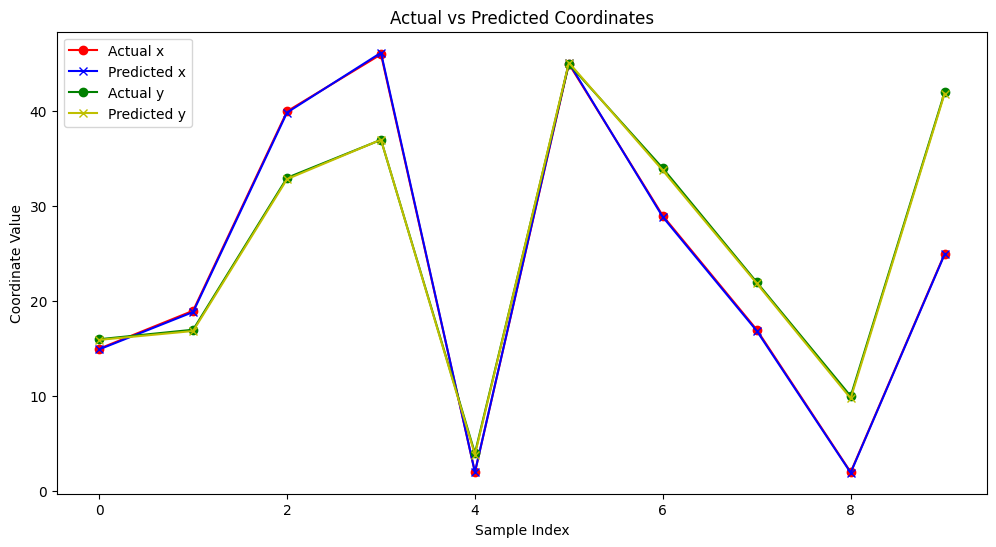

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test_labels[:10, 0], 'ro-', label='Actual x')
plt.plot(predictions[:10, 0], 'bx-', label='Predicted x')
plt.plot(test_labels[:10, 1], 'go-', label='Actual y')
plt.plot(predictions[:10, 1], 'yx-', label='Predicted y')

plt.title('Actual vs Predicted Coordinates')
plt.xlabel('Sample Index')
plt.ylabel('Coordinate Value')
plt.legend()
plt.show()

The above figure plots the x & y coordinates seperately, which again shows the overlaping between the actual & predicted values plots. Hence, a highly accurate model.